# **Unlocking Food Price Insights - An Advanced Analysis**

---



![Image: A global map visualizing food price trends with different color intensities representing price levels.](https://as2.ftcdn.net/v2/jpg/05/73/83/03/1000_F_573830325_ATVFFmqEIWQ8ltIqxnTWULsh8R6VmzRf.jpg)

---



**Welcome!**

In this notebook, we'll conduct advanced analysis and predictive modeling using the WFP Food Prices Database. While we'll place particular emphasis on Food Security Assessment in Ethiopia, our exploration extends to several other critical areas.

We'll begin by meticulously examining the data and transforming it for deeper insights. Then, leveraging Power BI's advanced capabilities, we'll delve into various analyses, including inflation trends, regional price disparities, market integration, and predictive modeling for price forecasting.

Discover how data-driven methods are used to address global food security challenges!

---




# **I. Data Extraction**

## 1: Import Necessary Libraries

In [92]:
import pandas as pd

## 2: Load The Dataset

In [93]:
# Assuming the dataset is named 'wfp_food_prices_database.csv' and located in the same directory as the notebook
file_path = 'wfp_food_prices_database.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path, low_memory=False)

In [94]:
print(df.columns)

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')


## 3: Initial Data Exploration

In [95]:
# Display the first few rows of the DataFrame to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Check the data types and missing values
print("\nData types and missing values:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

First few rows of the dataset:
   adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id  \
0      1.0  Afghanistan      272  Badakhshan     266  Fayzabad     55   
1      1.0  Afghanistan      272  Badakhshan     266  Fayzabad     55   
2      1.0  Afghanistan      272  Badakhshan     266  Fayzabad     55   
3      1.0  Afghanistan      272  Badakhshan     266  Fayzabad     55   
4      1.0  Afghanistan      272  Badakhshan     266  Fayzabad     55   

          cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Bread - Retail     0.0      AFN     15  Retail      5      KG         1   
1  Bread - Retail     0.0      AFN     15  Retail      5      KG         2   
2  Bread - Retail     0.0      AFN     15  Retail      5      KG         3   
3  Bread - Retail     0.0      AFN     15  Retail      5      KG         4   
4  Bread - Retail     0.0      AFN     15  Retail      5      KG         5   

   mp_year  mp_price  mp_commoditysource  
0     2014      50

# **II. Data Transformation**

## 1. Data cleaning



Handle Missing Values



In [96]:
print(df.isnull().sum())

adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              471328
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    1560551
dtype: int64


In [97]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Impute missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values with mode for categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check if there are any missing values left
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values:
adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              471328
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    1560551
dtype: int64
Missing Values After Imputation:
adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name                   0
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name 

Remove Duplicated Rows

In [98]:
# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

## 2. Aggregation and Summerization

Aggregating Prices by Mean

In [99]:
# Aggregating prices by calculating the mean price for each commodity
commodity_mean_prices = df.groupby('cm_name')['mp_price'].mean().reset_index()

Summerizing By Market

In [100]:
market_summary = df.groupby('mkt_name').agg({'mp_price': ['mean', 'median', 'std']}).reset_index()

## 3. Feature Engineering



In [101]:
# Creating a New Feature: Price Differential
df['price_diff'] = df.groupby('cm_name')['mp_price'].transform(lambda x: x.max() - x.min())

## 4. Data Formatting

Parsing Dates

In [102]:
# Convert 'mp_year' and 'mp_month' to integers
df['mp_year'] = df['mp_year'].astype(int)
df['mp_month'] = df['mp_month'].astype(int)

# Concatenate 'mp_year' and 'mp_month' as strings and then convert to datetime
df['date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str), format='%Y-%m')

## 5. Data Filtering and Subset Selection

Filtering Outliers

In [103]:
# Define a function to detect outliers using z-score
def detect_outliers(series, threshold=3):
    z_scores = (series - series.mean()) / series.std()
    return series[abs(z_scores) > threshold]

# Remove outliers in mp_price column
df = df[~df['mp_price'].isin(detect_outliers(df['mp_price']))]


## 6. Advanced Analysis

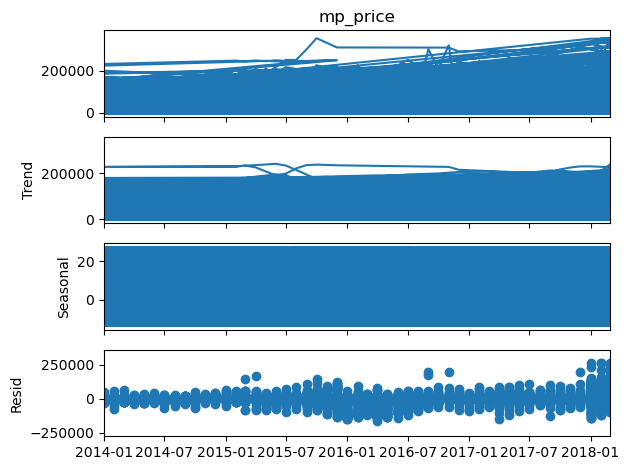

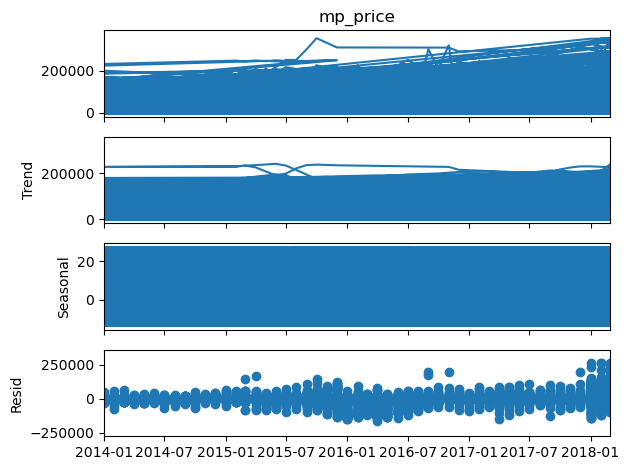

In [104]:
# Assuming 'date' column has been parsed
# Perform time series analysis, such as decomposition or forecasting, to identify trends and seasonality in food prices
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series data into trend, seasonal, and residual components
result = seasonal_decompose(df.set_index('date')['mp_price'], model='additive', period=12)  # Assuming the data has monthly frequency

# Plot the decomposed components
result.plot()


# **II. Data Load**

In [86]:
import psycopg2
from sqlalchemy import create_engine

# Database connection parameters
dbname = 'wfp_etl'
user = 'postgres'
password = 'Passdaggy'
host = 'your_host'
port = 'your_port'  # Default port for PostgreSQL is 5432

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)

# Create a cursor object
cur = conn.cursor()

# Define table creation SQL statements
create_commodity_prices_table = """
CREATE TABLE IF NOT EXISTS commodity_prices (
    id SERIAL PRIMARY KEY,
    adm0_id INT,
    adm0_name VARCHAR(255),
    adm1_id INT,
    adm1_name VARCHAR(255),
    mkt_id INT,
    mkt_name VARCHAR(255),
    cm_id INT,
    cm_name VARCHAR(255),
    cur_id INT,
    cur_name VARCHAR(255),
    pt_id INT,
    pt_name VARCHAR(255),
    um_id INT,
    um_name VARCHAR(255),
    mp_month INT,
    mp_year INT,
    mp_price NUMERIC,
    mp_commoditysource VARCHAR(255),
    price_diff NUMERIC,
    date DATE
);
"""

# Execute table creation SQL statements
cur.execute(create_commodity_prices_table)

# Commit the transaction
conn.commit()

# Create an SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

# Load data into the PostgreSQL database
df.to_sql('commodity_prices', engine, if_exists='replace', index=False)

# Close the cursor and connection
cur.close()
conn.close()


In [87]:
import psycopg2
from sqlalchemy import create_engine

# Database connection parameters# Database connection parameters
dbname = 'wfp_separated'
user = 'postgres'
password = 'Passdaggy'
host = 'localhost'
port = '5432'  # Default port for PostgreSQL is 5432

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)

# Create a cursor object
cur = conn.cursor()

# Define table creation SQL statements for administrative regions
create_admin_regions_table = """
CREATE TABLE IF NOT EXISTS admin_regions (
    adm0_id INT PRIMARY KEY,
    adm0_name VARCHAR(255),
    adm1_id INT,
    adm1_name VARCHAR(255)
);
"""

# Define table creation SQL statements for markets
create_markets_table = """
CREATE TABLE IF NOT EXISTS markets (
    mkt_id INT PRIMARY KEY,
    mkt_name VARCHAR(255),
    adm1_id INT,
    adm1_name VARCHAR(255)
);
"""

# Define table creation SQL statements for commodities
create_commodities_table = """
CREATE TABLE IF NOT EXISTS commodities (
    cm_id INT PRIMARY KEY,
    cm_name VARCHAR(255)
);
"""

# Define table creation SQL statements for market prices
create_market_prices_table = """
CREATE TABLE IF NOT EXISTS market_prices (
    id SERIAL PRIMARY KEY,
    mkt_id INT,
    cm_id INT,
    mp_month INT,
    mp_year INT,
    mp_price NUMERIC,
    cur_id INT,
    pt_id INT,
    um_id INT,
    mp_commoditysource VARCHAR(255),
    price_diff NUMERIC,
    date DATE
);
"""

# Execute table creation SQL statements
cur.execute(create_admin_regions_table)
cur.execute(create_markets_table)
cur.execute(create_commodities_table)
cur.execute(create_market_prices_table)

# Commit the transaction
conn.commit()

# Load data into the PostgreSQL database
admin_regions_data = df[['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name']].drop_duplicates()
markets_data = df[['mkt_id', 'mkt_name', 'adm1_id', 'adm1_name']].drop_duplicates()
commodities_data = df[['cm_id', 'cm_name']].drop_duplicates()
market_prices_data = df[['mkt_id', 'cm_id', 'mp_month', 'mp_year', 'mp_price', 'cur_id', 'pt_id', 'um_id', 'mp_commoditysource', 'price_diff', 'date']]

# Create an SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

# Load administrative regions data into the PostgreSQL database
admin_regions_data.to_sql('admin_regions', engine, if_exists='replace', index=False)

# Load markets data into the PostgreSQL database
markets_data.to_sql('markets', engine, if_exists='replace', index=False)

# Load commodities data into the PostgreSQL database
commodities_data.to_sql('commodities', engine, if_exists='replace', index=False)

# Load market prices data into the PostgreSQL database
market_prices_data.to_sql('market_prices', engine, if_exists='replace', index=False)

# Close the cursor and connection
cur.close()
conn.close()


In [112]:
import psycopg2
from sqlalchemy import create_engine

# Database connection parameters
# Database connection parameters
dbname = 'wfp_separated'
user = 'postgres'
password = 'Passdaggy'
host = 'localhost'
port = '5432'  # Default port for PostgreSQL is 5432

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)

# Create a cursor object
cur = conn.cursor()

# Define table creation SQL statements for administrative regions
create_admin_regions_table = """
CREATE TABLE IF NOT EXISTS admin_regions (
    adm0_id INT PRIMARY KEY,
    adm0_name VARCHAR(255),
    adm1_id INT,
    adm1_name VARCHAR(255)
);
"""

# Define table creation SQL statements for markets
create_markets_table = """
CREATE TABLE IF NOT EXISTS markets (
    mkt_id INT PRIMARY KEY,
    mkt_name VARCHAR(255),
    adm1_id INT,
    adm1_name VARCHAR(255)
);
"""

# Define table creation SQL statements for commodities
create_commodities_table = """
CREATE TABLE IF NOT EXISTS commodities (
    cm_id INT PRIMARY KEY,
    cm_name VARCHAR(255)
);
"""

# Define table creation SQL statements for market prices
create_market_prices_table = """
CREATE TABLE IF NOT EXISTS market_prices (
    id SERIAL PRIMARY KEY,
    mkt_id INT,
    cm_id INT,
    mp_month INT,
    mp_year INT,
    mp_price NUMERIC,
    cur_id INT,
    pt_id INT,
    um_id INT,
    mp_commoditysource VARCHAR(255),
    price_diff NUMERIC,
    date DATE
);
"""

# Execute table creation SQL statements
cur.execute(create_admin_regions_table)
cur.execute(create_markets_table)
cur.execute(create_commodities_table)
cur.execute(create_market_prices_table)

# Commit the transaction
conn.commit()

# Load data into the PostgreSQL database
admin_regions_data = df[['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name']].drop_duplicates()
markets_data = df[['mkt_id', 'mkt_name', 'adm1_id', 'adm1_name']].drop_duplicates()
commodities_data = df[['cm_id', 'cm_name']].drop_duplicates()
market_prices_data = df[['mkt_id', 'cm_id', 'mp_month', 'mp_year', 'mp_price', 'cur_id', 'pt_id', 'um_id', 'mp_commoditysource', 'price_diff', 'date']]

# Create an SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

# Load administrative regions data into the PostgreSQL database
admin_regions_data.to_sql('admin_regions', engine, if_exists='replace', index=False)

# Load markets data into the PostgreSQL database
markets_data.to_sql('markets', engine, if_exists='replace', index=False)

# Load commodities data into the PostgreSQL database
commodities_data.to_sql('commodities', engine, if_exists='replace', index=False)

# Load market prices data into the PostgreSQL database
market_prices_data.to_sql('market_prices', engine, if_exists='replace', index=False)

# Close the cursor and connection
cur.close()
conn.close()